<a href="https://colab.research.google.com/github/pjdoucette/MAT422/blob/main/HW_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.3 Independent Variables and Random Samples



---



Key Concepts:


*   Joint Probability Distributions
*   Correlation and Dependence
*   Random Samples

#### Set up

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.stats import pearsonr
from scipy.stats import norm



---



###Joint Probability Distributions

A **joint probability** is the probability of two or more events happening togeher. A **joint probability distribution** shows a probability distribution for two or more random variables
<br><br>
**Definition 2.3.1**

Let $X$ and $Y$ be two discrete random variables defined on $S$. Their join PMF:
$$ p(x,y) = P(X=x \text{ and } Y=y)$$
<br>
**Definition 2.3.2**

The marginal PMF of X and Y
$$ p_X(x) = \sum_y p(x, y) \text{, } p_Y(y) = \sum_x p(x, y) $$
<br>
**Definition 2.3.3**

Let $X$ and $Y$ be two continuous random variables. Their joint PDF is a function satisfying:

$$ f(x, y) \geq 0 \text{ and } \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x, y) , dx , dy = 1 $$

For any two-dimensional set $A$:
$$ P[(X,Y) \in A] = P(a \leq X \leq b, c \leq Y \leq d) = \int_{a}^{b} \int_{c}^{d} f(x, y) , dy , dx $$
<br>
**Definition 2.3.4**

The marginal PDF of X and Y:
$$ f_X(x) = \int_{-\infty}^{\infty} f(x, y) , dy \text{, } f_Y(y) = \int_{-\infty}^{\infty} f(x, y) , dx $$
<br>

P(X=1, Y=2) = 0.1
f(X=0.5, Y=-0.5) = 0.11146595955293902


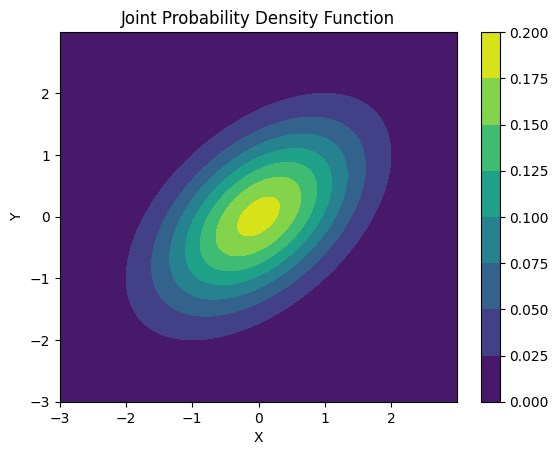

In [12]:
# Joint Probability Mass Function (Discrete Case)
def joint_pmf(x, y):
    joint_probs = {
        (0, 0): 0.1, (0, 1): 0.2, (0, 2): 0.1,
        (1, 0): 0.15, (1, 1): 0.05, (1, 2): 0.1,
        (2, 0): 0.05, (2, 1): 0.1,  (2, 2): 0.15
    }
    return joint_probs.get((x, y), 0)

# Joint probability P(X=1, Y=2)
x_val, y_val = 1, 2
print(f"P(X={x_val}, Y={y_val}) = {joint_pmf(x_val, y_val)}")

# Marginal PDFs or X and Y
def marginal_pdf_X(x):
    return multivariate_normal(mean=mean[0], cov=cov[0][0]).pdf(x)

def marginal_pdf_Y(y):
    return multivariate_normal(mean=mean[1], cov=cov[1][1]).pdf(y)


# Joint Probability Density Function (Continuous Case)
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]
rv = multivariate_normal(mean, cov)

# Probability density at (x,y)
x_val, y_val = 0.5, -0.5
print(f"f(X={x_val}, Y={y_val}) = {rv.pdf([x_val, y_val])}")

x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))
plt.contourf(x, y, rv.pdf(pos), cmap='viridis')
plt.title('Joint Probability Density Function')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()



**Definition 2.3.5**

Two random variavles $X$ and $Y$ are said to be independent if for every pair of $x$ and $y$ values:

Discrete: $p(x, y) = p_X(x) \cdot p_Y(y)$ OR

Continuous: $f(x, y) = f_X(x) \cdot f_Y(y)$


In [13]:
# Variable independence
def check_independence(x, y):
    joint_pdf = rv.pdf([x, y])
    marginal_pdf_product = marginal_pdf_X(x) * marginal_pdf_Y(y)
    return np.isclose(joint_pdf, marginal_pdf_product)

# Check independence at (x,y)
x_val, y_val = 0.5, -0.5
if check_independence(x_val, y_val):
    print(f"X and Y are independent at (X={x_val}, Y={y_val})")
else:
    print(f"X and Y are dependent at (X={x_val}, Y={y_val})")

X and Y are dependent at (X=0.5, Y=-0.5)


**Definition 2.3.6 & 2.3.7**

The concepts of joint distribution and independence can be extended to more than 2 random variables:

PMF: $p(x_1, x_2, ..., x_n) = P(X_1 = x_1, X_2 = x_2, ..., X_n = x_n)$

PDF: $P(a_1 \leq X_1 \leq b_1, ..., a_n \leq X_n \leq b_n) = \int_{a_1}^{b_1} ... \int_{a_n}^{b_n} f(x_1, ..., x_n) , dx_1 ... dx_n$

Independence: $f(x_1, ..., x_n) = f_{X_1}(x_1) \cdot ... \cdot f_{X_n}(x_n)$
(The joint pmf or pdf of the subset is equal to the product of the marginal pmf's or pdf's)

###Correlation and Dependence
Correlation is useful because it can indicate a predictive relationship that can be exploited in practice. Covariance is a measure of the joint variability of two random variables.

<br>

**Definition 2.3.8**  
Let $X$ and $Y$ be jointly distributed random variables with pmf $p(x, y)$ or pdf $f(x, y)$, according to whether the variables are discrete or continuous. The covariance between two random variables $X$ and $Y$ is:

$$
\text{Cov}(X, Y) = \mathbb{E}[(X - \mu_X)(Y - \mu_Y)]
$$
For discrete $X$ and $Y$:

$$
\text{Cov}(X, Y) = \sum_x \sum_y (x - \mu_X)(y - \mu_Y) \, p(x, y)
$$

For continuous $X$ and $Y$:

$$
\text{Cov}(X, Y) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} (x - \mu_X)(y - \mu_Y) \, f(x, y) \, dx \, dy
$$
Since $X - \mu_X$ and $Y - \mu_Y$ are the deviations of the two variables from their respective mean values, the covariance is the expected product of deviations. Note:
$$
\text{Cov}(X, X) = \mathbb{E}[(X - \mu_X)^2] = \text{Var}(X)
$$
The correlation coefficient is the covariance of the two variables divided by the product of their standard deviations, which measures the linear correlation between two variables or sets of data.

<br>

**Definition 2.3.9**  

The correlation coefficient of $X$ and $Y$, denoted by $\rho_{X,Y}$ or just $\rho$, is defined by:

$$
\rho_{X,Y} = \frac{\text{Cov}(X, Y)}{\sigma_X \cdot \sigma_Y}
$$

<br>

**Proposition 2.3.10**

Correlation coefficients have the following properties:

- If $X$ and $Y$ are independent, then $\rho = 0$, but $\rho = 0$ does not imply independence.
- $|\rho| \leq 1$, and $\rho = 1$ or $-1$ if $Y = aX + b$ for some numbers $a$ and $b$ with $a \neq 0$.

The sample correlation coefficient, denoted by $r_{xy}$, referred to as the sample Pearson correlation coefficient. Given paired data $\{(x_1, y_1), \dots, (x_n, y_n)\}$, the sample correlation coefficient is calculated as:

$$
r_{xy} = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \cdot \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

where $\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$ is the sample mean of $x$, and similarly for $\bar{y}$.

<br>

**Proposition 2.3.11**

The sample correlation coefficient has the following properties:

$$
r_{xy} = \frac{s_{xy}}{s_x \cdot s_y}
$$

where $s_{xy}$ is the sample covariance:

$$
s_{xy} = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
$$

and $s_x$ is the sample standard deviation:

$$
s_x = \sqrt{\frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

If $y = ax + b$, then $r_{xy} = 1$ or $-1$ if $a$ is positive or negative.


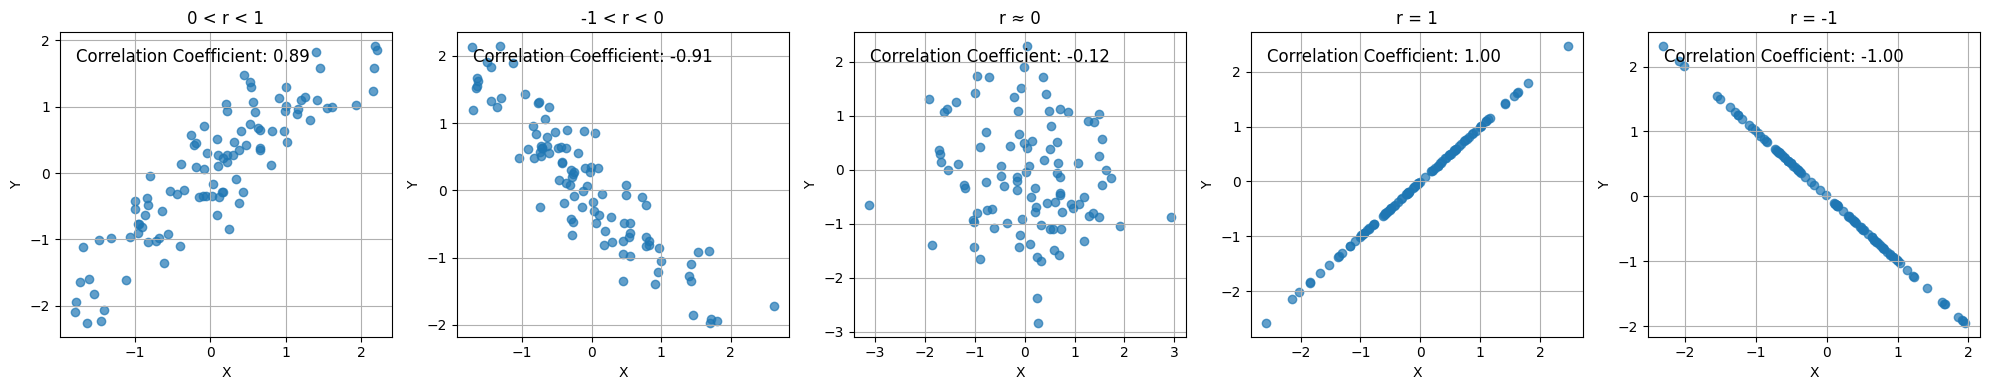

In [19]:


# Function to plot data
def plot_data_and_correlation(ax, x, y, title):
    ax.scatter(x, y, alpha=0.7)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(title)
    ax.grid(True)

    corr_coef, _ = pearsonr(x, y)
    ax.text(0.05, 0.95, f'Correlation Coefficient: {corr_coef:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')

# Function to generate data with specifc r-val
def generate_data_with_corr(r, size=100):
    x = np.random.normal(0, 1, size)
    y = r * x + np.random.normal(0, np.sqrt(1 - r**2), size)
    return x, y

# Example correlation values
r_values = [0.9, -0.9, 0, 1, -1]
titles = ['0 < r < 1', '-1 < r < 0', 'r ≈ 0', 'r = 1', 'r = -1']

# Plot
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
for i, r in enumerate(r_values):
    x, y = generate_data_with_corr(r)
    plot_data_and_correlation(axs[i], x, y, titles[i])

plt.tight_layout()
plt.show()


###Random Samples

**Definition 2.3.12**

The random variables $X_1, X_2, \ldots, X_n$ are said to form a (simple) random sample of size $n$ if:

- The $X_i$’s are independent random variables
- Every $X_i$ has the same probability distribution

We can estimate the population mean $\mu$ using the sample mean $\bar{X} = \frac{1}{n} (X_1 + \cdots + X_n)$. Common inferential methods rely on the properties of the sampling distribution of $\bar{X}$, particularly its expectation $\text{E}(\bar{X})$ and variance $\text{V}(\bar{X})$ in relation to $\mu$, $\sigma^2$, and $n$.

<br>

**Proposition 2.3.13**

Let $X_1, X_2, \ldots, X_n$ be a random sample from a distribution with mean $\mu$ and standard deviation $\sigma$. Then:

- $\text{E}(\bar{X}) = \mu$

- $\text{V}(\bar{X}) = \frac{\sigma^2}{n} \quad \text{and} \quad \sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}}$

In addition, with $T_o = X_1 + \cdots + X_n$ (the sample total):

- $\text{E}(T_o) = n \mu$

- $\text{V}(T_o) = n \sigma^2 \quad \text{and} \quad \sigma_{T_o} = \sqrt{n} \sigma$

<br>

**Theorem 2.3.14 (The Central Limit Theorem (CLT))**

Let $X_1, X_2, \ldots, X_n$ be a random sample from a distribution with mean $\mu$ and variance $\sigma^2$. Then, if $n$ is sufficiently large, $\bar{X}$ has approximately a normal distribution with:

$$\text{E}(\bar{X}) = \mu$$

$$\text{V}(\bar{X}) = \frac{\sigma^2}{n}$$

And $T_o$ also has approximately a normal distribution with:

$$\text{E}(T_o) = n \mu$$

$$\text{V}(T_o) = n \sigma^2$$

The larger the value of $n$, the better the approximation.


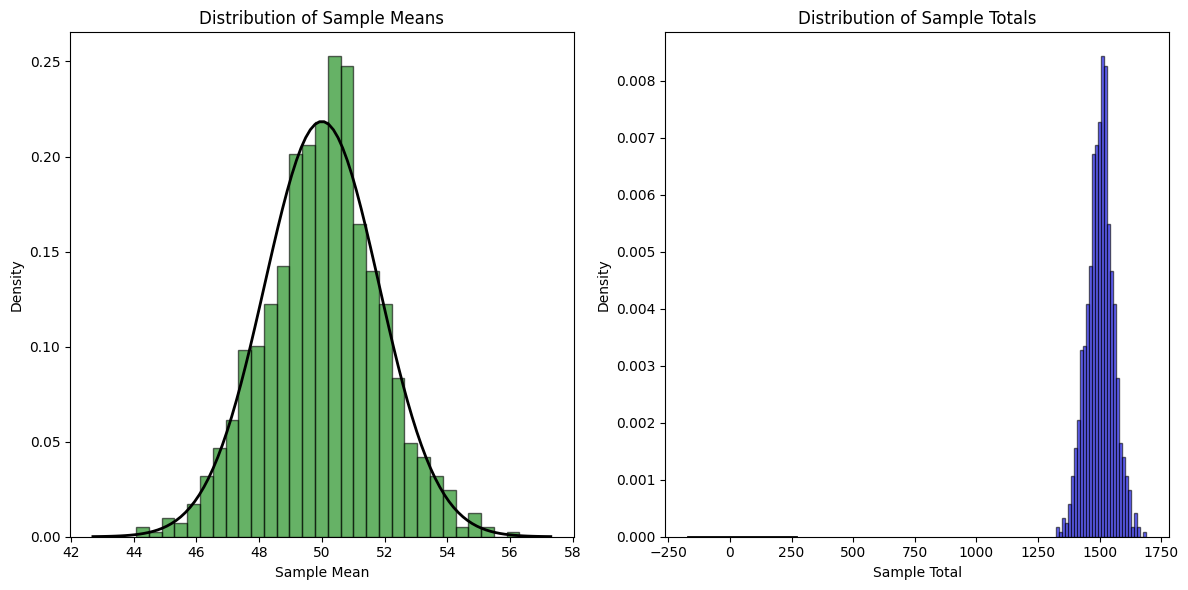

Theoretical Values: 
 Mean of sample means: 50
 Variance of sample means: 3.3333333333333335
 Standard deviation of sample means: 1.8257418583505538

 Mean of sample totals: 1500
 Variance of sample totals: 3000
 Standard deviation of sample totals: 54.772255750516614


In [29]:
# Params
n = 30
mu = 50
sigma = 10
num_samples = 1000

# Sample data
samples = np.random.normal(mu, sigma, (num_samples, n))
sample_means = np.mean(samples, axis=1)
sample_totals = np.sum(samples, axis=1)

plt.figure(figsize=(12, 6))

# Plot sample means
plt.subplot(1, 2, 1)
plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
x = np.linspace(mu - 4 * sigma / np.sqrt(n), mu + 4 * sigma / np.sqrt(n), 100)
plt.plot(x, norm.pdf(x, mu, sigma / np.sqrt(n)), 'k', linewidth=2)
plt.title('Distribution of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Density')

# Plot sample totals
plt.subplot(1, 2, 2)
plt.hist(sample_totals, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')
x = np.linspace(mu - 4 * sigma * np.sqrt(n), mu + 4 * sigma * np.sqrt(n), 100)
plt.plot(x, norm.pdf(x, n * mu, sigma * np.sqrt(n)), 'k', linewidth=2)
plt.title('Distribution of Sample Totals')
plt.xlabel('Sample Total')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Print values
print(f"Theoretical Values: ")
print(f" Mean of sample means: {mu}")
print(f" Variance of sample means: {sigma**2 / n}")
print(f" Standard deviation of sample means: {sigma / np.sqrt(n)}\n")
print(f" Mean of sample totals: {n * mu}")
print(f" Variance of sample totals: {n * sigma**2}")
print(f" Standard deviation of sample totals: {sigma * np.sqrt(n)}")